In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
%matplotlib inline

In [270]:
def plot_1D(x, y, y_e=0.0, ax=None):

    if ax is None:
        fig, ax = plt.subplots()
    
    ax.plot(x, y)
    ax.fill_between(x, y-y_e, y+y_e, color='black', alpha=0.5)

    return ax

## Delta Peak

In [271]:
# Voltage Values
N_p             = 7
N_voltages      = 5000
step_size       = 1e-10
time            = step_size*np.arange(N_voltages)[:-1]*1e9
max_pos         = [1,2,4,8,16,32,64,128,256,512]

data            = {i : pd.read_csv(f"data/Nx={N_p}_Ny={N_p}_Nz=1_Ne=8_{i}.csv") for i in range(len(max_pos))}

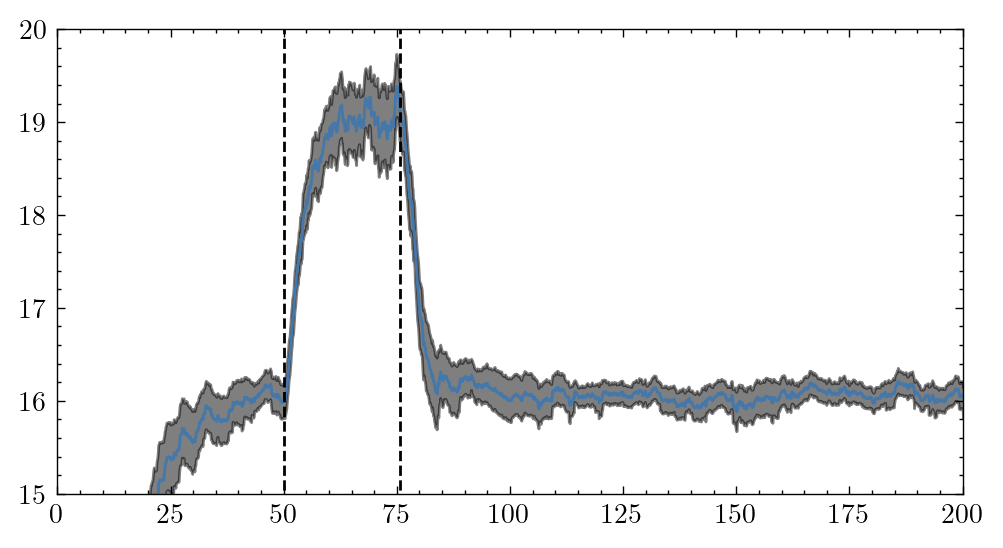

In [294]:
i   = 8
t   = time.copy()
x   = data[i]['E0']*1000
y   = data[i]['Current']*1000
y_e = data[i]['Error']*1000

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*1.4)
    ax  = fig.add_subplot()
    ax  = plot_1D(t, y, y_e, ax=ax)
    ax.vlines(x=t[500], ymin=0, ymax=20, color='black', ls='dashed')
    ax.vlines(x=t[500+max_pos[i]], ymin=0, ymax=20, color='black', ls='dashed')
    ax.set_xlim(0,200)
    ax.set_ylim(15,20)

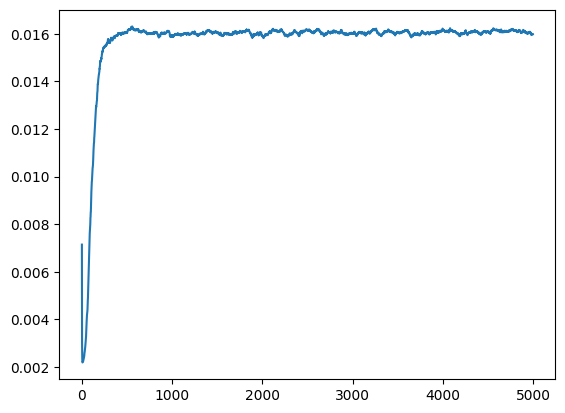

In [267]:

plt.plot(data[2]['Current'].values)

In [268]:
N_voltages  = 2000
step_size   = 1e-10
time        = step_size*np.arange(1,N_voltages)*1e9
data        = [{target_electrode : pd.read_csv(f"data/Nx={N_particles}_Ny={N_particles}_Nz=1_Ne=8_{target_electrode}.csv") for target_electrode in range(1,7)} for N_particles in [3,5,7,9]]

FileNotFoundError: [Errno 2] No such file or directory: 'data/Nx=3_Ny=3_Nz=1_Ne=8_1.csv'

In [240]:
data[3][1]

,E0,E1,E2,E3,E4,E5,E6,G,Eq_Jumps,Jumps,Current,Error
0,0.1,0.068135,0.054574,0.060823,0.047796,0.027901,0.039791,0.0,0.0,1.614,0.068135,0.000597
1,0.1,0.068117,0.054550,0.060887,0.047801,0.027897,0.039890,0.0,0.0,1.640,0.068117,0.000602
2,0.1,0.068117,0.054628,0.060967,0.047820,0.027917,0.039985,0.0,0.0,1.566,0.068117,0.000599
3,0.1,0.068118,0.054666,0.061021,0.047810,0.027913,0.039928,0.0,0.0,1.600,0.068118,0.000607
4,0.1,0.068044,0.054638,0.061041,0.047807,0.027866,0.039986,0.0,0.0,1.654,0.068044,0.000606
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.1,0.068203,0.054739,0.060839,0.047889,0.027987,0.039992,0.0,0.0,1.620,0.068203,0.000541
1995,0.1,0.068191,0.054763,0.060845,0.047892,0.028047,0.039961,0.0,0.0,1.690,0.068191,0.000542
1996,0.1,0.068303,0.054771,0.060866,0.047872,0.028042,0.039809,0.0,0.0,1.620,0.068303,0.000533
1997,0.1,0.068296,0.054759,0.060908,0.047876,0.028024,0.039844,0.0,0.0,1.702,0.068296,0.000531


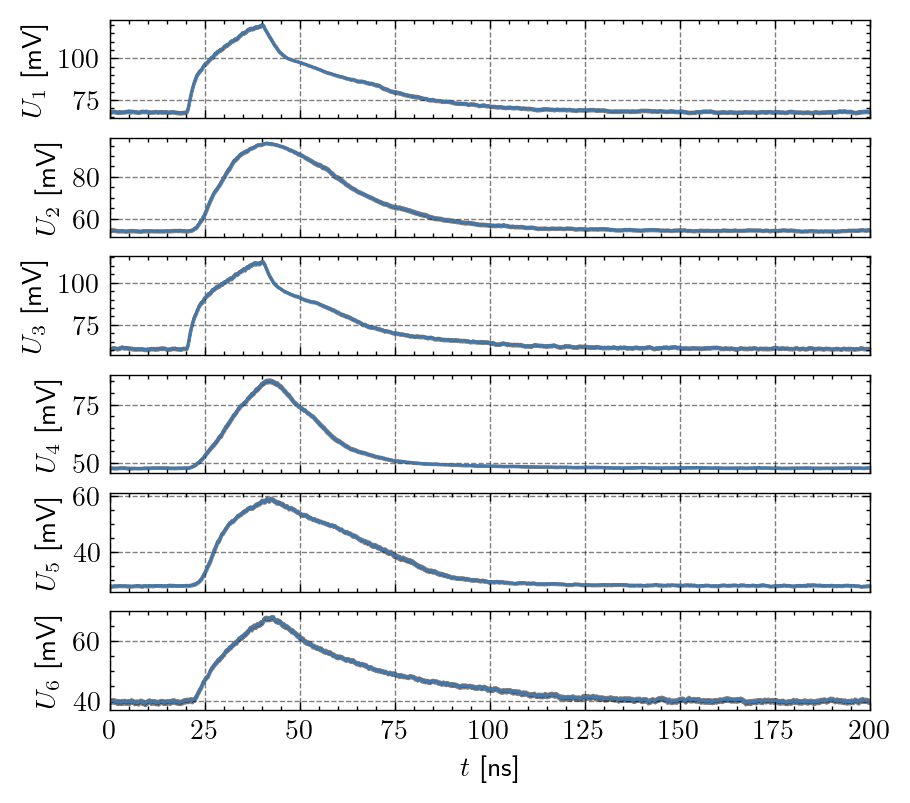

In [241]:
N_vals  = [3,5,7,9]
index   = 3

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    fig.set_figheight(fig.get_figheight()*2.0)

    for i, df in data[index].items():

        ax      = fig.add_subplot(7,1,i)
        values  = df['Current']*1000
        error   = df['Error']*1000

        ax.plot(time, values)#, label='$N_{NP} ='+f' {N}$')
        ax.fill_between(x=time, y1=values-error, y2=values+error, color='black', alpha=0.5)
        ax.set_ylabel(f"$U_{i}$ [mV]")
        ax.set_xlim(0,200)
        
        if i != 6:
            ax.set_xticklabels("")

    ax.set_xlabel("$t$ [ns]")

    fig.savefig(f"plots/step_response_{N_vals[index]}.svg", transparent=True)

In [242]:
def find_maximum(df):
    return np.where(df==df.max())[0][0]

def find_minimum(df, min, start):

    less_than = np.where(df < min)[0]
    return less_than[less_than > start][0]

In [243]:
starts  = [410,410,410,410]
ends    = [max([find_minimum(data[n][i].loc[:,'Current'], data[n][i].loc[:100,'Current'].mean(), starts[n]) for i in range(1,7)]) for n in range(4)]

In [244]:
starts  = [410,410,410,410]
ends    = [450,550,800,1000]
cvs     = {}

for n, j in enumerate(N_vals):

    means   = [(data[n][i].loc[starts[n]:ends[n],'Current'] - data[n][i].loc[0:100,'Current'].mean()).mean() for i in range(1,7)]
    stds    = [(data[n][i].loc[starts[n]:ends[n],'Current'] - data[n][i].loc[0:100,'Current'].mean()).std() for i in range(1,7)]
    cvs[j]  = [stds[i]/means[i] for i in range(0,6)]

In [245]:
df_cv = pd.DataFrame()
for key, vals in cvs.items():
    df_cv[key*key] = vals
df_cv

,9,25,49,81
0,1.072996,0.963606,0.894213,0.648273
1,0.980359,0.985547,0.981463,0.713277
2,0.964107,0.972724,0.973440,0.714315
3,0.920858,1.076485,1.246221,1.087692
4,0.867795,0.789494,0.813818,0.659156
5,0.902932,0.799580,0.802235,0.552536


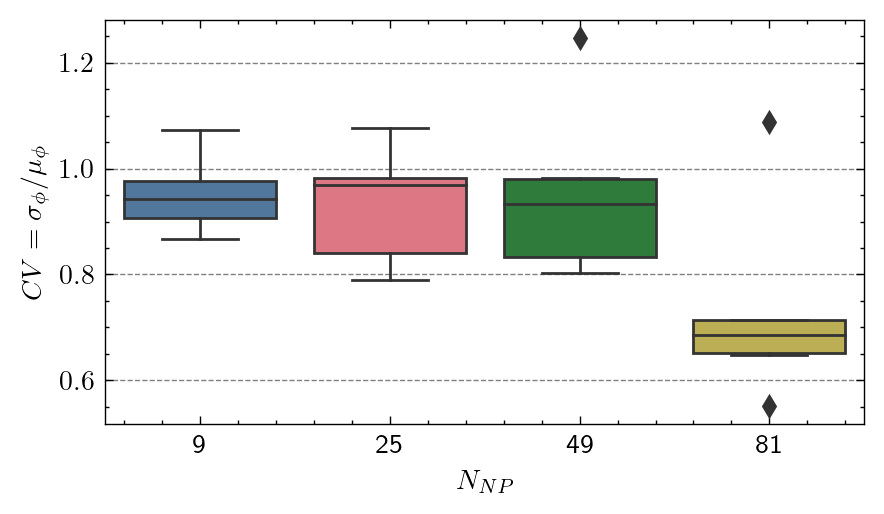

In [246]:
with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)

    ax  = fig.add_subplot()
    ax  = sns.boxplot(df_cv)
    ax.set_xlabel("$N_{NP}$")
    ax.set_ylabel("$CV = \sigma_\phi / \mu_\phi$")
    fig.savefig(f"plots/cv.svg", transparent=True)